# Overview:
## Predicting the category of messages whether it belongs to Ham/Spam category

# Some important libraries importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading CSV file

In [3]:
df = pd.read_csv('sms_ham_spam_data.csv')

In [6]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Number of ROWs Vs Columns

In [14]:
df.shape

(5574, 2)

# how many ham msgs are in data

In [9]:
df[df['type']=='ham'].shape

(4827, 2)

# how many spam msgs in data

In [11]:
df[df['type']=='spam'].shape

(747, 2)

# is there any null values in data

In [12]:
df.isnull().sum()

type    0
text    0
dtype: int64

# how many types of taraget variables with number of Msgs

In [16]:
df['type'].value_counts()

ham     4827
spam     747
Name: type, dtype: int64

# This unbalanced data, so lets make it balanced

### Making ham and spam Msgs separate

In [17]:
ham = df[df['type']=='ham']

In [19]:
ham.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [18]:
spam = df[df['type']=='spam']

In [20]:
spam.head()

,type,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


# Taking sample from ham equal number of spam rows

In [22]:
ham = ham.sample(spam.shape[0])

In [23]:
ham.shape

(747, 2)

# merging spam and ham (sampled) into one dataframe

In [24]:
data = ham.append(spam)

In [28]:
data.shape

(1494, 2)

# Now in data there are equal number of ham and spam Msgs

In [25]:
data.head()

,type,text
1630,ham,Sounds like you have many talents! would you l...
4575,ham,:( but your not here....
889,ham,You unbelievable faglord
2046,ham,Okay... I booked all already... Including the ...
4279,ham,I've reached home finally...


In [26]:
data.tail()

,type,text
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,Had your contract mobile 11 Mnths? Latest Moto...
5568,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5569,spam,This is the 2nd time we have tried 2 contact u...


# Data Prepration
### importing libraries to make model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
data.head()

,type,text
1630,ham,Sounds like you have many talents! would you l...
4575,ham,:( but your not here....
889,ham,You unbelievable faglord
2046,ham,Okay... I booked all already... Including the ...
4279,ham,I've reached home finally...


# making train and test df with 70:30
- Stratified sampling
- Shuffle is True

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['type'], test_size=0.3, random_state=42, shuffle=True, stratify=data['type'])

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1045,)
(1045,)
(449,)
(449,)


In [45]:
x_train.head()

1195                                        Ok... C ya...
1229    FREE entry into our £250 weekly comp just send...
1099    NO GIFTS!! You trying to get me to throw mysel...
1807    Todays Voda numbers ending 1225 are selected t...
1192    Come to my home for one last time i wont do an...
Name: text, dtype: object

In [47]:
x_test.head()

1461    Yalru lyfu astne chikku.. Bt innu mundhe lyf a...
4690          Didn't try, g and I decided not to head out
4870    1. Tension face 2. Smiling face 3. Waste face ...
3160         Are you up for the challenge? I know i am :)
1469    Hi its LUCY Hubby at meetins all day Fri & I w...
Name: text, dtype: object

# Defining TF-IDF vectrizer function for further use as 'vectorizer'

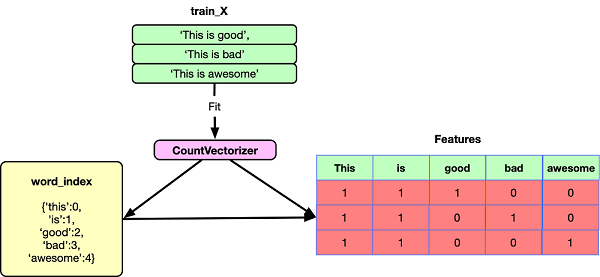

Bag of words will create a dictionary of the most common words in all the sentences. For the example above the dictionary would look like:

In [48]:
vectorizer = TfidfVectorizer()

In [49]:
Xtrain = vectorizer.fit_transform(x_train)

# There are 3867 unique word in 1045 rows of data

In [50]:
Xtrain.shape

(1045, 3867)

In [51]:
Xtrain

<1045x3867 sparse matrix of type '<class 'numpy.float64'>'
	with 17886 stored elements in Compressed Sparse Row format>

# Pipeline 
- Setup multiple inputs same time

In [53]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [54]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [63]:
y_predict = clf.predict(x_test)

In [65]:
y_predict.shape

(449,)

In [66]:
x_test.shape

(449,)

# Checking the performance of Model

In [67]:
confusion_matrix(y_test, y_predict)

array([[224,   1],
       [ 21, 203]], dtype=int64)

In [68]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       225
        spam       1.00      0.91      0.95       224

   micro avg       0.95      0.95      0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# Lets test manually for ham/spam messages

In [72]:
clf.predict(['i am giving to two movie tickets enjoy!!'])

array(['ham'], dtype=object)

In [75]:
clf.predict(['You won prize of free movie tickets enjoy!!'])

array(['spam'], dtype=object)

# ================================================

# Lets do the same by SVM

In [77]:
clf1 = Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=100, gamma='auto'))])

In [78]:
clf1.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [79]:
y_predict = clf1.predict(x_test)

In [80]:
print(y_predict.shape)
print(x_test.shape)

(449,)
(449,)


In [81]:
confusion_matrix(y_test, y_predict)

array([[223,   2],
       [ 25, 199]], dtype=int64)

In [82]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       225
        spam       0.99      0.89      0.94       224

   micro avg       0.94      0.94      0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [83]:
clf1.predict(['i am giving to two movie tickets enjoy!!'])

array(['ham'], dtype=object)

In [84]:
clf1.predict(['You won prize of free movie tickets enjoy!!'])

array(['spam'], dtype=object)